In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#seaborn
import seaborn as sns
import io
import requests

In [ ]:
# mount data file from google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TaxiData.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0


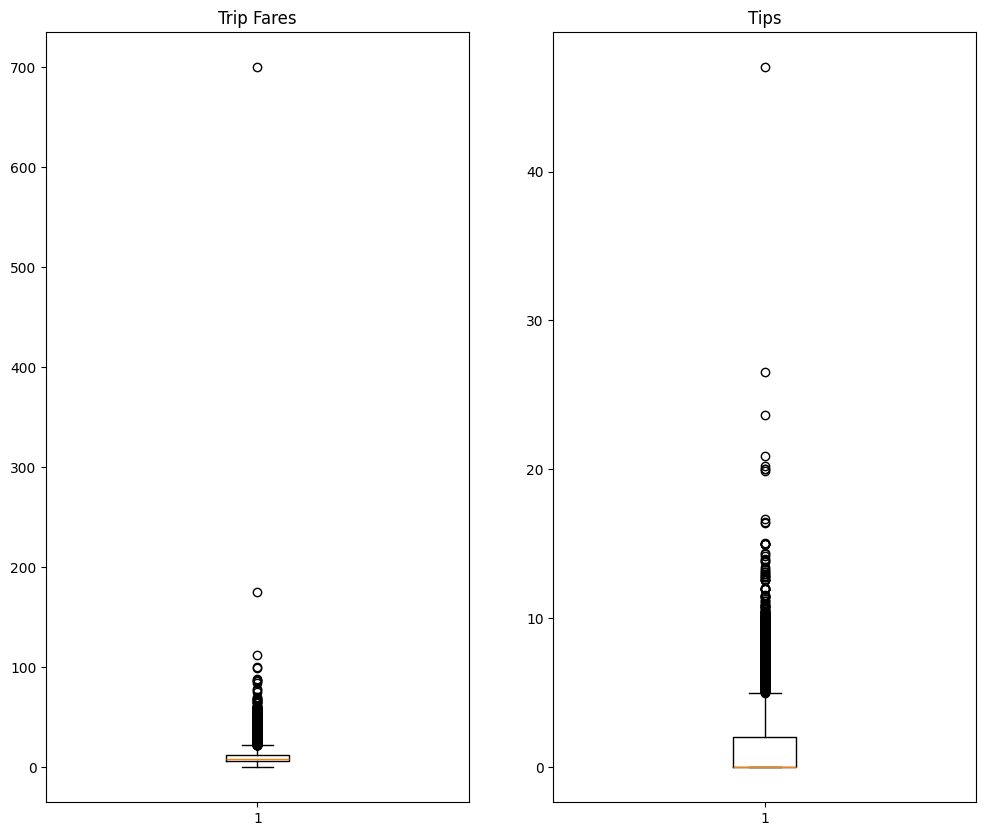

In [ ]:
# For Q4: only parameters needed is fare, tip values, duration(trip_seconds), distance(trip_miles), and location(pickup and dropoff co-ordinates)

# Use box plots to identify outliers in fare and tip values

fares = df['fare']
tips = df['tips']

fig = plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.title('Trip Fares')
plt.boxplot(fares)
plt.subplot(1, 2, 2)
plt.title('Tips')
plt.boxplot(tips)
plt.show()


The points above the higher whisker or below the lower whisker in both the box plots can be treated as outliers. In the above plots, only the outliers have been marked with an 'o'.


Interpretation: Discuss how these outliers might skew average calculations.

Outliers in fare and tip values can significantly skew average (mean) calculations because averages are highly sensitive to extreme values. For service providers, inflated averages due to outliers might lead to overestimating revenue projections or misinterpreting customer generosity in tipping. If pricing or service strategies are based on these skewed averages, it may lead to misguided business decisions, such as setting unrealistic fare targets or tipping benchmarks.

Suggest methods for handling these outliers in predictive models (e.g., removal
or adjustment).

- Removing Outliers: This method is useful when outliers are rare or clearly erroneous (e.g., data entry mistakes). It's appropriate if the outliers do not represent valid variations of the data. Any data point outside 1.5 * IQR (Inter Quartile Range) below the first quartile or above the third quartile can be considered an outlier and removed.
- Transforming data: Transformation techniques are effective when the data has a skewed distribution, and we want to reduce the influence of outliers without removing them. Commonly used transformations are the logarithmic and square-root/cube-root.
- Imputation: Imputation is suitable if you want to retain data but need to replace outliers with more reasonable values, often using the mean, median, or a statistical model.

In [ ]:
# Linear Regression Model

# drop rows with NaN from df
df = df[['trip_miles', 'trip_seconds', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'fare']]
df.dropna(inplace=True)
# print(df.head())

# df.dropna(inplace=True).copy(

X = df.drop('fare', axis=1)
Y = df['fare']

print(X)
print(Y)

       trip_miles  trip_seconds  pickup_latitude  pickup_longitude  \
20           0.00           0.0        41.849247        -87.624135   
28           3.50         900.0        41.952823        -87.653244   
29           0.23         120.0        41.899670        -87.669838   
30           1.10         360.0        41.906026        -87.675312   
31           1.70         480.0        41.906651        -87.665338   
...           ...           ...              ...               ...   
14996        0.00           0.0        41.904935        -87.649907   
14997        0.00          60.0        41.904935        -87.649907   
14998        0.00           0.0        41.904935        -87.649907   
14999        0.30         180.0        41.904935        -87.649907   
15000        3.00         780.0        41.809018        -87.659167   

       dropoff_latitude  dropoff_longitude  
20             0.000000           0.000000  
28            41.920452         -87.679955  
29            41.920452 

<ipython-input-7-a1cf20caeaac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
# regression
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

# check data type of x_train

def parameter_estimate(X, Y):
  # Solve for beta using the normal equation: β = (X^T * X)^(-1) * X^T * Y
  XTX = np.dot(X.T, X)
  XTY = np.dot(X.T, Y)

  # Solve for beta coefficients using numpy's linear algebra solver
  B_est = np.linalg.solve(XTX, XTY)
  return B_est

def plot_comparison(Y_train, Y_pred):
  plt.size = (10, 10)
  plt.scatter(Y_train, Y_pred)
  plt.xlabel('Actual Yield')
  plt.ylabel('Predicted Yield')
  plt.show()

def predict(X_test, B_est):
  return np.dot(X_test, B_est)

[ 7.69620870e-02  5.10155105e-03 -4.48852248e+01 -2.15218602e+01
 -2.53065137e+01 -1.21149990e+01]
[ 9.55835903  8.90282329  4.14067403 ...  8.29038847 24.03094797
 10.28465914]


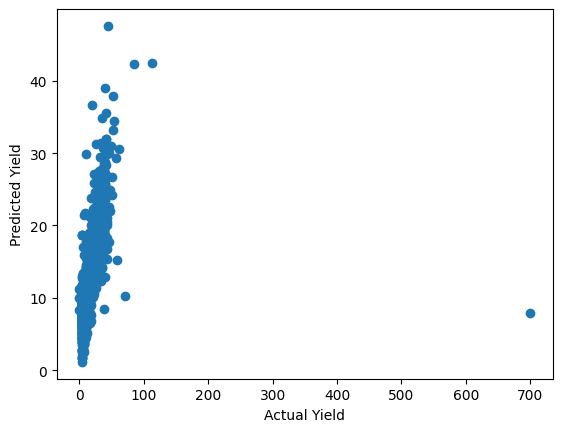

In [ ]:
B = parameter_estimate(X_train, Y_train)
print(B)

Y_predict = predict(X_test, B)
print(Y_predict)

# print(Y_test)

plot_comparison(Y_test, Y_predict)

In [ ]:
# compute errors between actual and predicted values

mae = np.mean(np.abs(Y_test - Y_predict))
print("MAE: ", mae)

mse = np.mean(np.square(Y_test - Y_predict))
print("MSE: ", mse)

rmse = np.sqrt(np.mean(np.square(Y_test - Y_predict)))
print("RMSE: ", rmse)

mape = np.mean(np.abs((Y_test - Y_predict) / Y_test)) * 100
print("MAPE: ", mape)

mase = np.mean(np.abs(Y_test - Y_predict)) / np.mean(np.abs(Y_test - np.mean(Y_test)))
print("MASE: ", mase)




MAE:  4.269580902567472
MSE:  201.55749909815867
RMSE:  14.197094741465898
MAPE:  inf
MASE:  0.6415432250265547


Discuss the effectiveness of the model, noting any potential limitations or areas for improvement.



- The model implemented in code here considers only linear terms of the factors involved. However, there could be terms with higher powers of the factors involved.
- The model was trained on an arbitrary fraction of the given data, and tested on the remaining fraction. This could cause a certain bias in the model. This can be improved by using K-fold cross validation.
- This estimation being parametric, involves assumptions on the data which may not be appropriate.
- The training data ignores entries with NaN values. Instead, we could use data imputation methods to replace the NaN values with meaningful values.